### CIFAR 10 dataset

In [85]:
# 데이터 불러와서 전 처리
# x 데이터를 4차원 텐서로 변환하세요.  # 이미 4차원이니 할 필요는 없으나, 할 때 밑과 같게 함
# y 데이터를 one-hot 데이터로 변환하세요. 
from keras.datasets import cifar10
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 32, 32, 3)
x_train = x_train.astype('float32')/255

x_test = x_test.reshape(10000, 32, 32, 3)
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


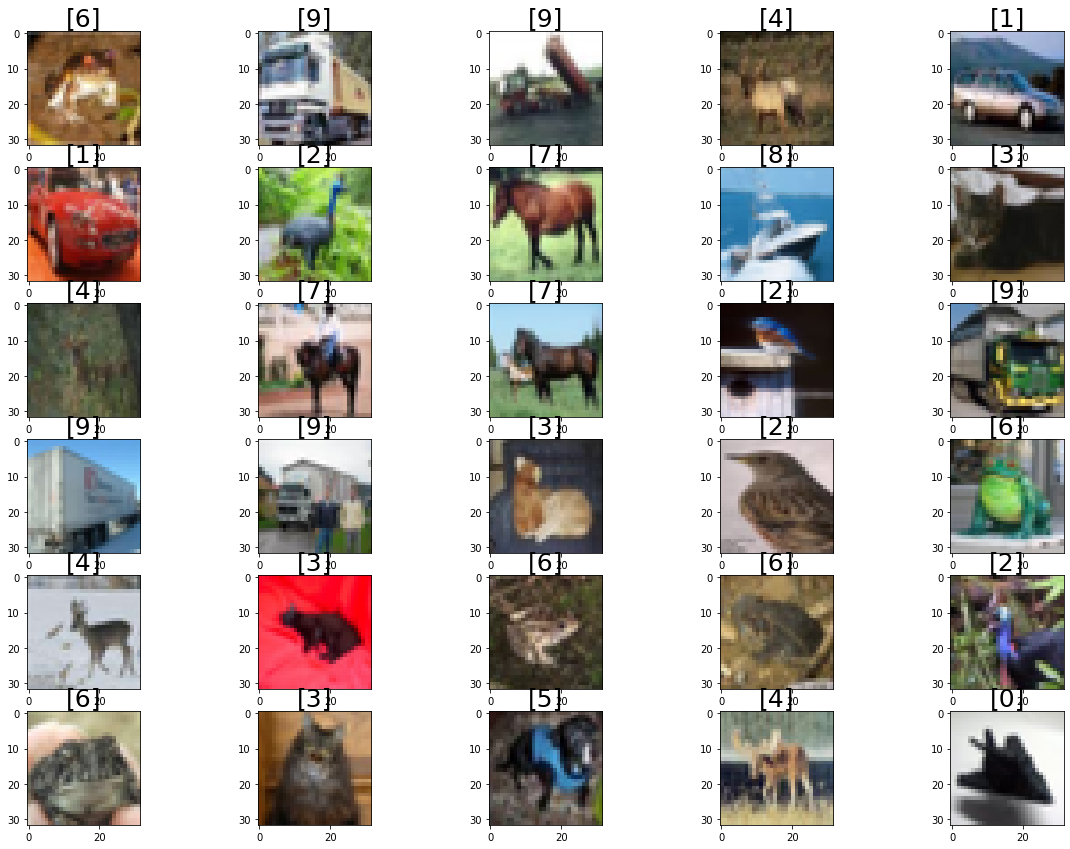

In [86]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


plt.figure(figsize=(20,500))
for index, (image, label) in enumerate(zip(x_train[0:30], y_train[0:30])):
    plt.subplot(200,5, index+1)
    plt.imshow(image)
    plt.title(label, fontsize=25)
plt.show()

# 드롭아웃 적용 전

In [87]:
# cnn 모델을 구성하세요. 아래 summary의 아키텍쳐를 참고하세요. 
from keras import layers
from keras import models

model = models.Sequential() 
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))  #필터 32개
model.add(layers.MaxPool2D( (2,2) ) ) #풀링과정 거치면 크기가 절반으로 된다
model.add(layers.Conv2D(64, (3,3), activation='relu')) #다시 64개로 늘린다음
model.add(layers.MaxPool2D((2,2))) #다시 반띵
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2))) #다시 반띵
###############피쳐가 익스트랙트 하는 과정#################
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer = "adam",loss = "sparse_categorical_crossentropy",
      metrics =["accuracy"])

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 256)             

In [89]:
# 학습을 시키세요. validation split는 0.2로, batch_size 는 64로 학습 시키세요. 

cnn_his=model.fit(x_train, y_train, epochs=30, batch_size=64, validation_split=0.2)



Epoch 1/30
625/625 [==============================] - 3s 4ms/step - loss: 1.9979 - accuracy: 0.3265 - val_loss: 1.6129 - val_accuracy: 0.4120
Epoch 2/30
625/625 [==============================] - 2s 4ms/step - loss: 1.4622 - accuracy: 0.4706 - val_loss: 1.4337 - val_accuracy: 0.4884
Epoch 3/30
625/625 [==============================] - 2s 4ms/step - loss: 1.2882 - accuracy: 0.5391 - val_loss: 1.2582 - val_accuracy: 0.5565
Epoch 4/30
625/625 [==============================] - 2s 4ms/step - loss: 1.1616 - accuracy: 0.5853 - val_loss: 1.1829 - val_accuracy: 0.5787
Epoch 5/30
625/625 [==============================] - 2s 4ms/step - loss: 1.0676 - accuracy: 0.6247 - val_loss: 1.1273 - val_accuracy: 0.6146
Epoch 6/30
625/625 [==============================] - 2s 4ms/step - loss: 0.9910 - accuracy: 0.6510 - val_loss: 1.2488 - val_accuracy: 0.5886
Epoch 7/30
625/625 [==============================] - 2s 3ms/step - loss: 0.9176 - accuracy: 0.6783 - val_loss: 1.0900 - val_accuracy: 0.6282
Epoch 

# 드롭아웃 적용 후

In [90]:
# cnn 모델을 구성하세요. 아래 summary의 아키텍쳐를 참고하세요. 
from keras import layers
from keras import models

dpt = models.Sequential() 
dpt.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))  #필터 32개
dpt.add(layers.MaxPool2D( (2,2) ) ) #풀링과정 거치면 크기가 절반으로 된다
dpt.add(layers.Conv2D(64, (3,3), activation='relu')) #다시 64개로 늘린다음
dpt.add(layers.MaxPool2D((2,2))) #다시 반띵
dpt.add(layers.Conv2D(64, (3,3), activation='relu'))
dpt.add(layers.MaxPool2D((2,2))) #다시 반띵
###############피쳐가 익스트랙트 하는 과정#################
dpt.add(layers.Flatten())
dpt.add(layers.Dense(512,activation='relu'))
dpt.add(layers.Dropout(0.5))
dpt.add(layers.Dense(512,activation='relu'))
dpt.add(layers.Dropout(0.5))
dpt.add(layers.Dense(10,activation='softmax'))
dpt.compile(optimizer = "adam",loss = "sparse_categorical_crossentropy",
      metrics =["accuracy"])

dpt.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 256)             

In [91]:
dpt_his=dpt.fit(x_train, y_train, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
625/625 [==============================] - 2s 4ms/step - loss: 2.2009 - accuracy: 0.1981 - val_loss: 1.7851 - val_accuracy: 0.3116
Epoch 2/30
625/625 [==============================] - 2s 4ms/step - loss: 1.7737 - accuracy: 0.3251 - val_loss: 1.5784 - val_accuracy: 0.4026
Epoch 3/30
625/625 [==============================] - 2s 4ms/step - loss: 1.6100 - accuracy: 0.4013 - val_loss: 1.4934 - val_accuracy: 0.4473
Epoch 4/30
625/625 [==============================] - 2s 4ms/step - loss: 1.4881 - accuracy: 0.4555 - val_loss: 1.3817 - val_accuracy: 0.5098
Epoch 5/30
625/625 [==============================] - 2s 4ms/step - loss: 1.3914 - accuracy: 0.4979 - val_loss: 1.3299 - val_accuracy: 0.5175
Epoch 6/30
625/625 [==============================] - 2s 4ms/step - loss: 1.3184 - accuracy: 0.5280 - val_loss: 1.2891 - val_accuracy: 0.5345
Epoch 7/30
625/625 [==============================] - 2s 4ms/step - loss: 1.2560 - accuracy: 0.5509 - val_loss: 1.2488 - val_accuracy: 0.5580
Epoch 

# 모델 예측


In [93]:
# 테스트 데이터를 이용하여 모델을 평가하세요(evaluate)
model.evaluate(x_test, y_test)
dpt.evaluate(x_test, y_test) 


313/313 [==============================] - 1s 2ms/step - loss: 1.1692 - accuracy: 0.6139


[1.1691826581954956, 0.6139000058174133]

# loss 시각화

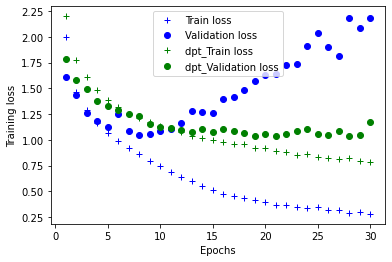

In [94]:
# 위의 학습 결과에 대해 LOSS를 시각화 해보세요. 
import matplotlib.pyplot as plt

original_train_loss = cnn_his.history['loss']
original_val_loss = cnn_his.history['val_loss']

dpt_train_loss = dpt_his.history['loss']
dpt_val_loss = dpt_his.history['val_loss']




epochs = range(1, len(original_train_loss) + 1)

plt.plot(epochs, original_train_loss, 'b+', label='Train loss')
plt.plot(epochs, original_val_loss, 'bo', label='Validation loss')
plt.plot(epochs, dpt_train_loss, 'g+', label='dpt_Train loss')
plt.plot(epochs, dpt_val_loss, 'go', label='dpt_Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()




# 정확도 측정

In [96]:
import numpy as np
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [109]:
#모델을 사용하여 테스트 이미지에 대한 예측을 해보세요.
predictions = dpt.predict(x_test)

y_test=y_test.reshape(10000,)

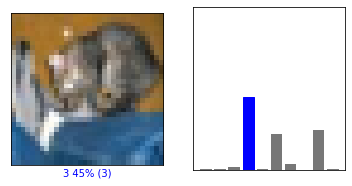

In [111]:
# 0번째 원소의 이미지, 예측, 실제정답(test y값) 을 시각화 해보세요.
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

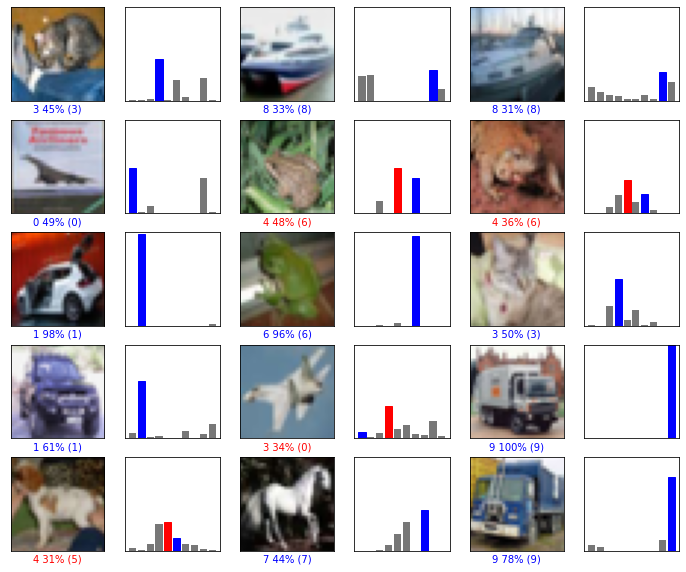

In [112]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타내보자.
# 테스트 데이터는 0 ~ 14 index까지 예측해보세요. 

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()